# Clustering Knowledge Summary 
## K-means clustering

What if we do not have any training data? Unsupervised approach - k-means clustering - can help learning the most suitable cluster structure given a suggested number of clusters $k$. 

Works for the data samples ($N$ points) in $n$-dimensional Euclidean space: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},
$$ 
where $x_i$ are the $n$-dimensional raw-vectors corresponding to each of the $N$ sample points. The approach is trying to infer cluster indexes $c_i$ (taking one of the possible values $1,2,...,k$) for each point $x_i$ in such a way that the cumulative squared distance from all the sample points $x_i$ to the centroids $\mu_{c_i}$ of the corresponding clusters $c_i$ is minimized. This is quite an intuitive criteria, meaning that the clusters as as compact as possible for the given number $k$. The cluster centroids are defined as simple vector means
$$
\mu_c=\sum_{i, c(i)=c} x_i/m(c),
$$
where
$$
m(c)=|\{i, c(i)=c\}|
$$
denotes the cluster size. Or in the coordinate form $\mu_c=(\mu_c^j, j=1..n)$
$$
\mu_c^j=\frac{\sum_{i, c(i)=c} x_i^j}{m(c)}, j=1..n.
$$
It can be shown that centroids selected that way mimize the cumulatize squared distance 
$$
SD=\sum_i \|x_i-\mu_{c(i)}\|^2=\sum_{i,j} \left(x_i^j-\mu_{c(i)}^j\right)^2\to \min
$$
since 
$$
0=\frac{\partial SD}{\partial \mu_c^j}=2\sum_{i,c(i)=c} \left(x_i^j-\mu_{c}^j\right)\Rightarrow m(c)\mu_c^j=\sum_{i,c(i)=c} x_i^j
$$

Alternatively one can think of the coordinates $x_i^j$ of the points $i$ within each cluster $c(i)=c$ to be generated using independent normal distributions $x_i^j\sim N(\mu_{c}^j,\sigma^2)$ with the same fixed variance. Then maximizing the joint likelihood of all the observed coordinates $x_i^j$ is equivalent to minimizing $SD$ as per above.

The common algorithm (often called after Lloyd) starts from a random cluster assignment and iterates the following two steps:

A. Compute cluster means.

B. Re-assign each point to the cluster with the mean closest to the considered point.

Alternative approach is to initially use $k$ random points of the sample as clusters means, starting from the step B.

The algorithm stops once a new iteration fails to alter any single cluster assignment.

Algorithm always converges to a local optimum of $SD$, however there is no guarantee that this partitioning is indeed the global optimum. Also the final outcome happens to depend on the initial partitioning. This way it makes sense to repreat $k$-means a number of times (like $10,25...100$ etc) with different random initial partitioning, picking up the partitioning with the best final $SD$. 

In order to figure out how many trials to consider one can keep adding them one by one tracking how do they affect the final score and stop once it stays stable for a while.


### Toy Example 1

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline

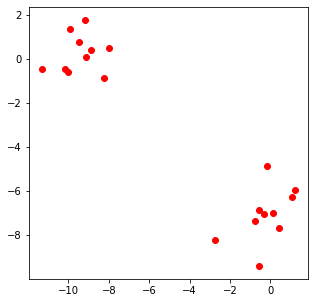

In [2]:
#generate artificual data for clustering
X, y = make_blobs(n_features=2, centers=2,n_samples=20,random_state=9)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

#### Perform clustering by hand to illustrate the process for this simple example:

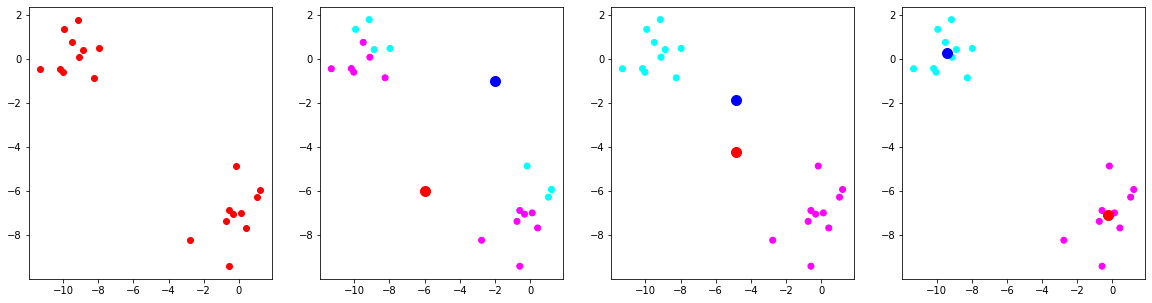

In [3]:
cent=np.asarray([[-6,-6],[-2,-1]]) #initial centroid
#original data visualization
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.scatter(X[:,0],X[:,1],c="r")
for i in range(3): #perform three iterations
    plt.subplot(1,4,i+2)
    y_t=np.sum((X-cent[0,:])**2,axis=1)**0.5<np.sum((X-cent[1,:])**2,axis=1)**0.5 #attach points to clustering based on centroid proximity
    #visualize clustering with different colors
    plt.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool)
    plt.scatter(cent[0,0],cent[0,1],c="r",s=100)
    plt.scatter(cent[1,0],cent[1,1],c="b",s=100)
    #recompute the centroids
    cent=np.asarray([[np.sum(X[:,0]*y_t)/(np.sum(y_t)),np.sum(X[:,1]*y_t)/np.sum(y_t)],
            [np.sum(X[:,0]*(1-y_t))/np.sum(1-y_t),np.sum(X[:,1]*(1-y_t))/np.sum(1-y_t)]])
plt.show()

In [4]:
#now do the same with KMeans from sklearn.cluster
from sklearn.cluster import KMeans

In [5]:
#initialize the model
km=KMeans(random_state=1,n_clusters=2) #look for two clusters; 
#k-means generally depends on random initial locations of the centroids, 
#so setting random state needed for result stability (although not really this time)
res=km.fit(X) #train the model
y_t=res.labels_
print(y_t) #output the result
# print res.predict(X) #alternative - one can pass this or other data to cluster according to the model trained (centroids) 

[0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0]


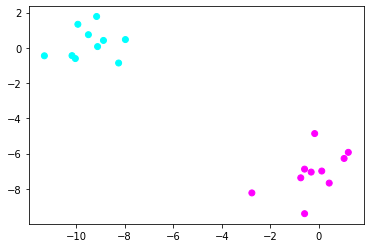

In [6]:
#visualize the clusters
plt.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool)

### Example 2: Picking the number of clusters

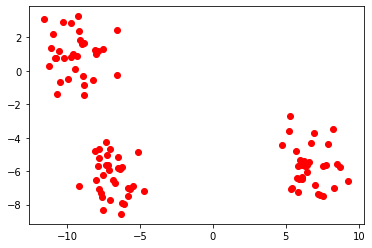

In [7]:
#generate another example 
X, y = make_blobs(n_features=2, centers=3,random_state=9999)
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

In [8]:
n=2 # number of clusters
tar=y # real target

#train the model
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(X)
print(res.labels_)

[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]


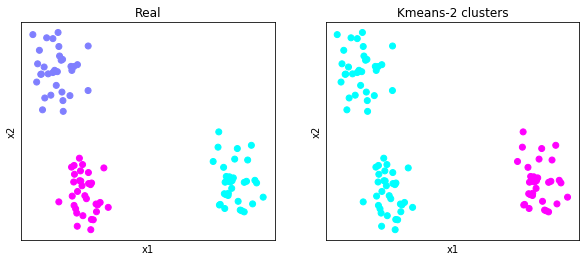

In [9]:
#Plot the original cluster assignment in the generated data against the results of k-means
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(X[:, 0], X[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

### So maybe k=3 is more appropriate? 
We see it visualially and from knowing how data was generated, but how can we quantitatively figure it out?

### *Choose the number of clusters. (k)

#### Silhouette Coefficient
In the example above we visually see that the data could still be clustered further. So how to select the appropriate number of clusters $k$ besides just naive visual observations? 

We can't use SD here anymore as the more clusters we take, the smaller it goes, and we'll get it down to zero, assigning each point to its own cluster, which is certianly not the most useful way of clustering.

We need another partitioning quality measure here. Most common option is using a Silhouette measure, which for each data point $x_i$ quantifies its relative attachement strength to its current cluster vs the closest neighbor cluster:
$$
s(i)=\frac{\min\limits_{k\neq c_i} \|x_i-\mu_{c_k}\|-\|x_i-\mu_{c_i}\|}{\max\{\|x_i-\mu_{c_i}\|,\min\limits_{k\neq c_i} \|x_i-\mu_{c_k}\|\}}.
$$

Then internal quality of the partitioning is characterized by an average ratio value of silhouette for all the data points:
$$
S=\frac{\sum\limits_i s(i)}{N}.
$$

By definition, the silhouette measure is normalized. i.e. $-1\leq s(i)\leq 1$ and so is the average: $-1\leq S\leq 1$. $S=1$ means that all the points coinside with their cluster centroids, values close to 1 mean that the points are usually much closer to their cluster centroids than to all the other ones (i.e. clustered appropriately), values of $S$ around zero mean that clustering is quite unstable, i.e. moving many of the points to another clusters might not affect its quality much; while negative values of $S$ mean that clustering could certainly be improved by moving some of the points to the other clusters.

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.7368734857292675
For n_clusters =3, the average silhouette_score is :0.7671939254942522
For n_clusters =4, the average silhouette_score is :0.6349411044958128
For n_clusters =5, the average silhouette_score is :0.5320171643922585


In [11]:
#the highest one is acheived for k=3

#### From the result of silhouette_score, we should choose k=3. 
Let's also visualize the individual silhouette score distributions for each point. This allows to diagnose which exact clusters are in good standing and which might be a problem by comparing their members' scores against average

In [12]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7368734857292675


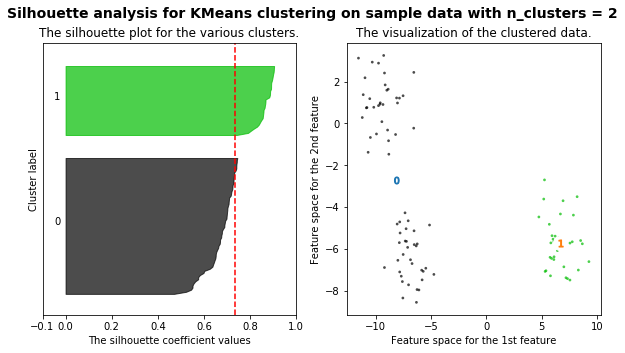

For n_clusters = 3 The average silhouette_score is : 0.7671939254942522


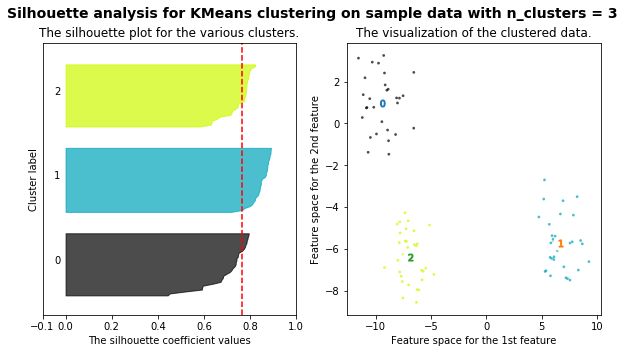

For n_clusters = 4 The average silhouette_score is : 0.6349411044958128


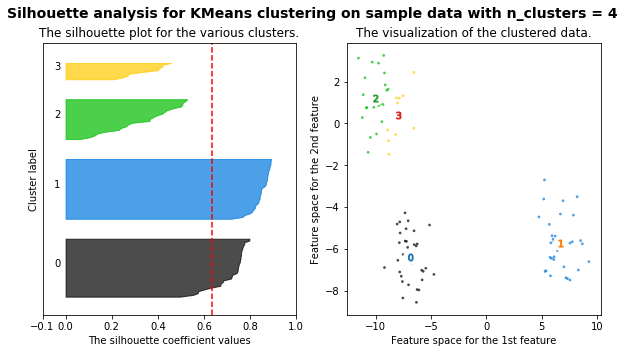

For n_clusters = 5 The average silhouette_score is : 0.5320171643922585


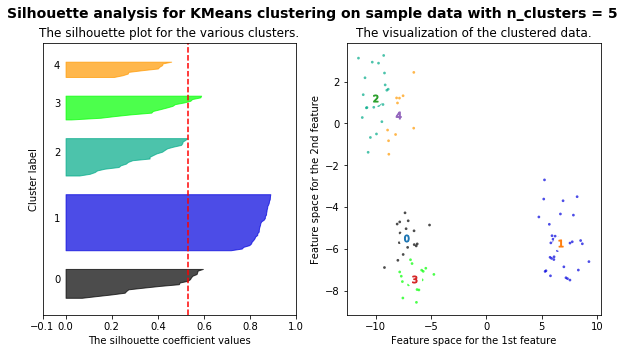

In [13]:
#plot
silhouette_score_plot(X,range(2,6))

### Elbow Method
The Elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

First of all, compute the sum of squared error (SSE) for some values of k (for example 2, 4, 6, 8, etc.). The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid. Mathematically:

$SSE=\sum^K_{i=1} \sum_{x\in c_i} dist(x,c_i)^2$

 If you plot k against the SSE, you will see that the error decreases as k gets larger; this is because when the number of clusters increases, they should be smaller, so distortion is also smaller. The idea of the elbow method is to choose the k at which the SSE decreases abruptly. This produces an "elbow effect" in the graph, as you can see in the following picture:


In [14]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

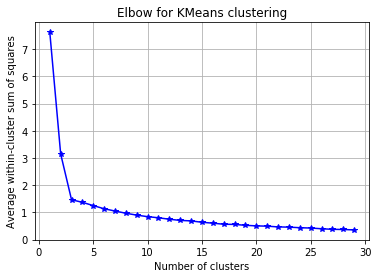

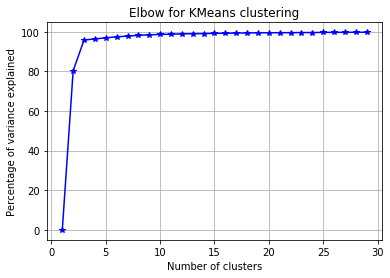

In [15]:
elbow(X, range(1,30))

### Example 3: Guassian Mixture. When KMeans does not work well.

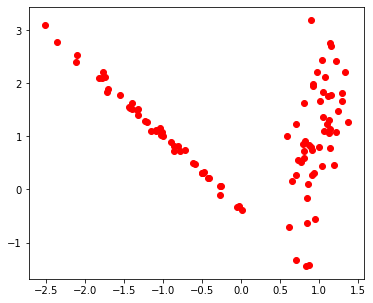

In [16]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1,random_state=13) #other good options: 13!!!, 14!!!, 17!!!, 19!!!, 5,8,12
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

Let us see what k-means will produce

In [17]:
# Real vs KMeans vs Guassian Mixture
n=2 # number of clusters
dd=X #data
tar=y # real target

km=KMeans(n_clusters=n)
res=km.fit(dd)
#res.labels_

Text(0.5, 1.0, 'Kmeans-2 clusters')

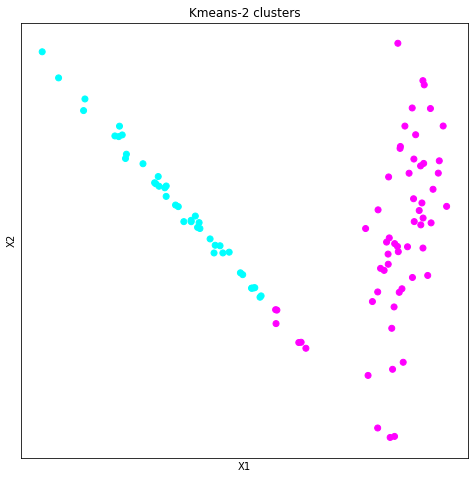

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))

This is because k-means distance-based objective function is defined in such a way where all directions are equal. This way it tends to produce circular/spherical clusters.

Let's generalize this approach to account for the clusters of more general shape. A probabilistic approach defines k-means through looking for independent normal distributions $x_i^j\sim N(\mu_{c}^j,\sigma^2)$ with the same fixed variance to explain observations for the coordinates $x_i^j$. But in general variances do not have to be the same and distributions for different coordinates do not have to be independent.

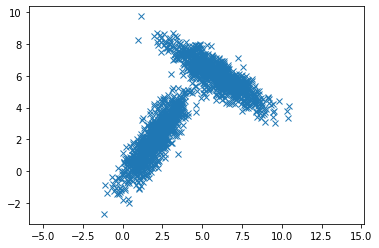

In [19]:
#consider a process where two sets of points are produces by multinomial normal distributions with non-diagonal covariance matrixes (leading to correlated coordinates)
mean = [2, 2]
cov = [[1, 1.2], [1.2, 2]]
x1, y1 = np.random.multivariate_normal(mean, cov, 1000).T
mean = [6, 6]
cov = [[2, -1.2], [-1.2, 1]]
x2, y2 = np.random.multivariate_normal(mean, cov, 1000).T
x=np.concatenate([x1,x2]); y=np.concatenate([y1,y2]);
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

Gaussian Mixture model will look for the set of multinomial normal distributions with arbitrary covariance matrixes which are best suited to explain the data and will cluster the points based on which of the distribution it is likely to be produced by. Moreover it will admit uncertainty in this attachment replacing discrete cluster attachment $c(i)$ with a probabilistic $p(i,c)=P(c(i)=c)$.

Namely it will look for the probabilistic data representation mixing several Gaussian distributions
$$
x_i\sim\sum_c p(i,c) N(\mu_c,\Sigma_c)
$$
with arbitrary means $\mu_c$, co-variance matrixes $\Sigma_c$ and attachment probabilities $p(i,c)$ to be fit in such a way that joint likelihood of the original data observations is maximized.

Make sure that you are using the recent sklearn: 0.18. (The old verison does not work correctly)

If not, please go to the terminal and use the following code to upgrade it.

conda install scikit-learn

In [20]:
# Check Sklearn version.
import sklearn
sklearn.__version__

'0.21.3'

In [21]:
#train the Gausian mixture model fitting two distributions
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=2,random_state=324)
res1=gm.fit(np.array([x,y]).transpose())

In [22]:
#and see if it got the original means and variances right
res1.means_

array([[2.03722895, 2.05144898],
       [5.92014662, 6.05292605]])

In [23]:
res1.covariances_

array([[[ 0.99350333,  1.20592633],
        [ 1.20592633,  2.03537424]],

       [[ 2.05257189, -1.23236532],
        [-1.23236532,  1.01617363]]])

Now use Gaussian Mixture model for the initial case above comparing the results vs k-means

In [24]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)

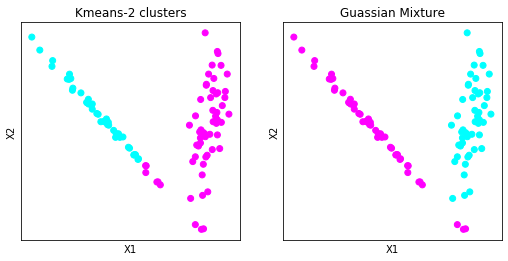

In [25]:
#Plot.
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(dd[:, 0], dd[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Original data clustering")

plt.subplot(1,4,2)
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))

plt.subplot(1,4,3)
plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()


### Example 4. Where even Gaussian Mixture fails - case for DBSCAN

In [26]:
n_samples = 1500
np.random.seed(0)
from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
X=noisy_circles[0]
L=noisy_circles[1]

Text(0, 0.5, 'X2')

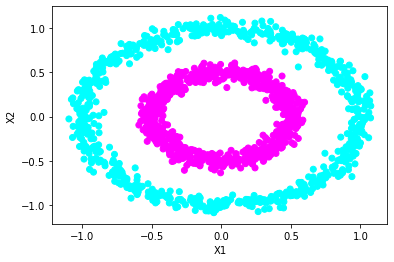

In [27]:
#original data clustering
plt.scatter(X[:, 0], X[:, 1], c=L, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')

In [28]:
#train Gaussian Mixture (as per above we should not even try k-means for such a case)
res1=GaussianMixture(n_components=n,random_state=324).fit(X)
L2=res1.predict(X)

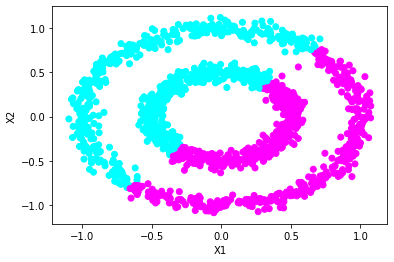

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1');
plt.ylabel('X2');

Even Gaussian Mixture model fails here as the underlying clusters do not look like consistent areas. We might use a different approach as below

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core subsets of high density first and expands clusters from them. Suitable for finding clusters of arbitrary shape, but they need to be of approximately same density. Can also detect outliers which do not belong to either of the clusters
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
https://en.wikipedia.org/wiki/DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
#now try DBSCAN
res2 = DBSCAN(eps=0.1, min_samples=4).fit(X)
L2=res2.labels_

Text(0, 0.5, 'X2')

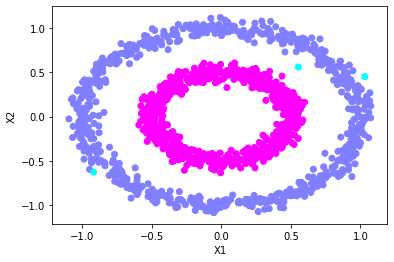

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')

### Real world case: 311 requests as a signature of urban location

Can we distinguish urban locations based on their 311 activity? Before we've seen that plotting location by PC's of their 311 activity can help distinguishing boroughs. This time lets directly cluster locations by their 311 signatures to see what exact zones do they identify and if this makes urban sense.

Use Kmeans to cluster NYC zip codes into 4 clusters. As before, the feature space is the percentages of 311 activity per category (from "Adopt A Basket" to the end) as provided.  Report the number of zip codes in each clusters. 

Visulize the clustering result on the map (for this part we will introduce geopandas).

This goes along the lines of our recent paper [Wang, L., Qian, C., Kats, P., Kontokosta, C., & Sobolevsky, S. (2017). Structure of 311 service requests as a signature of urban location. PloS one, 12(10), e0186314.]

In [33]:
#upload previous data we had on 311
data311 = pd.read_csv( 'data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [34]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')

In [35]:
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes

In [36]:
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)

In [37]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [38]:
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

In [39]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [40]:
#apply clustering
rr=KMeans(n_clusters=3, n_init=10, random_state=0).fit(data311)

In [41]:
max(rr.labels_)

2

In [42]:
#peek into the data
rr.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2])

In [43]:
#create a dictionary mapping zip codes to cluster labels
clust={data311.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}

In [44]:
clust

{10000.0: 2,
 10001.0: 2,
 10002.0: 2,
 10003.0: 2,
 10004.0: 2,
 10005.0: 2,
 10006.0: 2,
 10007.0: 2,
 10009.0: 1,
 10010.0: 2,
 10011.0: 2,
 10012.0: 2,
 10013.0: 2,
 10014.0: 2,
 10016.0: 2,
 10017.0: 2,
 10018.0: 2,
 10019.0: 2,
 10020.0: 2,
 10021.0: 2,
 10022.0: 2,
 10023.0: 2,
 10024.0: 2,
 10025.0: 1,
 10026.0: 1,
 10027.0: 1,
 10028.0: 2,
 10029.0: 1,
 10030.0: 1,
 10031.0: 1,
 10032.0: 1,
 10033.0: 1,
 10034.0: 1,
 10035.0: 1,
 10036.0: 2,
 10037.0: 1,
 10038.0: 2,
 10039.0: 1,
 10040.0: 1,
 10044.0: 1,
 10065.0: 2,
 10069.0: 2,
 10075.0: 2,
 10128.0: 2,
 10280.0: 2,
 10281.0: 2,
 10282.0: 2,
 10301.0: 0,
 10302.0: 0,
 10303.0: 0,
 10304.0: 0,
 10305.0: 0,
 10306.0: 0,
 10307.0: 0,
 10308.0: 0,
 10309.0: 0,
 10310.0: 0,
 10312.0: 0,
 10314.0: 0,
 10451.0: 1,
 10452.0: 1,
 10453.0: 1,
 10454.0: 1,
 10455.0: 1,
 10456.0: 1,
 10457.0: 1,
 10458.0: 1,
 10459.0: 1,
 10460.0: 1,
 10461.0: 0,
 10462.0: 1,
 10463.0: 1,
 10464.0: 0,
 10465.0: 0,
 10466.0: 1,
 10467.0: 1,
 10468.0: 1,

In [45]:
#create a dataframe
res=pd.DataFrame({'zipcode':data311.index, 'label':rr.labels_})

In [46]:
import geopandas as gpd

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [47]:
#read shapefiles of NYC zip codes
NYCzip=gpd.read_file('data/NY.shp')

In [48]:
NYCzip.head() #geopandas looks pretty much like pandas dataframe including both - labels/parameters and geometry - of the shapes

,zipcode,geometry
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...
1,11004.0,POLYGON Z ((-73.71068374074007 40.750040394509...
2,11040.0,POLYGON Z ((-73.70098278625547 40.738895699230...
3,11426.0,POLYGON Z ((-73.72270447144122 40.753733714383...
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...


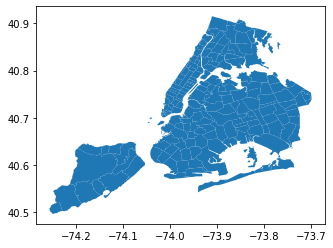

In [49]:
#or all together
NYCzip.plot()

In [50]:
NYCzip['cluster']=NYCzip.zipcode.map(clust)
NYCzip.dropna(inplace=True)

In [51]:
NYCzip.head()

,zipcode,geometry,cluster
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...,0.0
1,11004.0,POLYGON Z ((-73.71068374074007 40.750040394509...,0.0
2,11040.0,POLYGON Z ((-73.70098278625547 40.738895699230...,0.0
3,11426.0,POLYGON Z ((-73.72270447144122 40.753733714383...,0.0
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...,0.0


C:\ProgramData\Anaconda3\lib\site-packages\geopandas\plotting.py:400: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


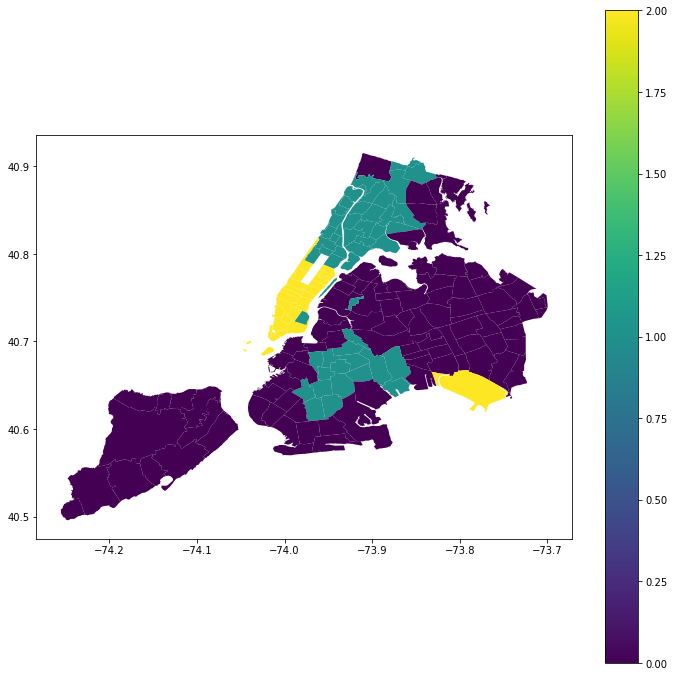

In [52]:
f, ax = plt.subplots(1, figsize=(12, 12))
NYCzip.plot(axes=ax, column='cluster', legend=True)

## Case 2. Perform urban zoning based on its mobility structure
Aggregate usage of each mobility mode within each cluster, normalize, output and visualize the results (bar plot)

In [54]:
#Upload the main dataset
SMdata=pd.read_csv("data/Socio-mobility.csv",index_col=0)

In [55]:
#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi','twitter_spatial':'twitter'},inplace=True)

In [58]:
#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("data/LEHD-work.csv",index_col=0)

In [59]:
#notice that residetial population here (from LEHD, based on the workforce residences) 
#is different from the one in the main dataset 
LEHDR=pd.read_csv("data/LEHD-resident.csv",index_col=0)

In [60]:
#merge the dataframes (inner merge on index - taxi zone number); take only the columns to use later
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter']].merge(LEHDW[['total']].rename(columns={'total':'working'}), on=None, left_index=True, right_index=True, how='inner')

In [61]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [62]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [64]:
#read shapefiles of NYC taxi zones
tzs=gpd.read_file('data/taxi_zones/taxi_zones.shp')

In [65]:
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [66]:
tzs=tzs.merge(SMdata,left_on='LocationID', right_index=True, how='inner')

In [67]:
ML=SMdata.columns

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


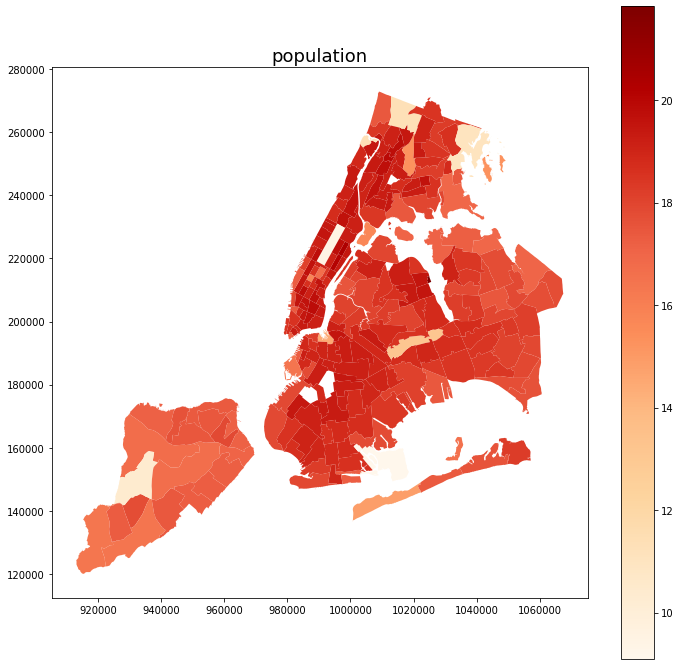

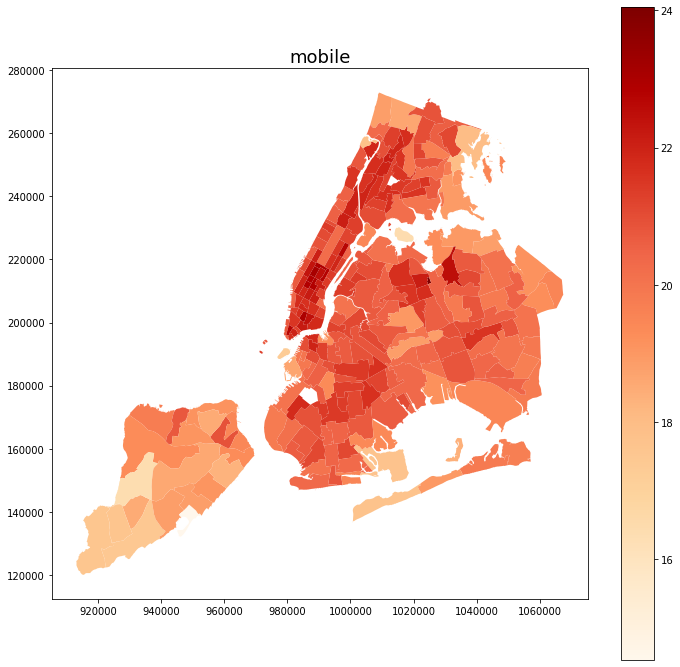

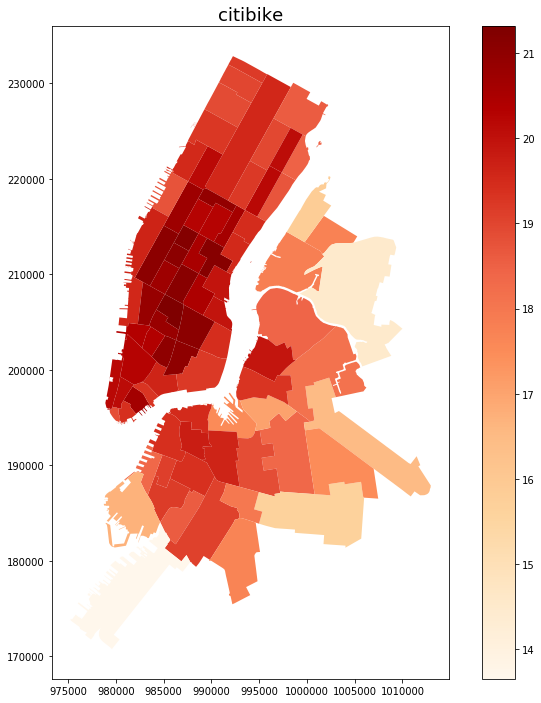

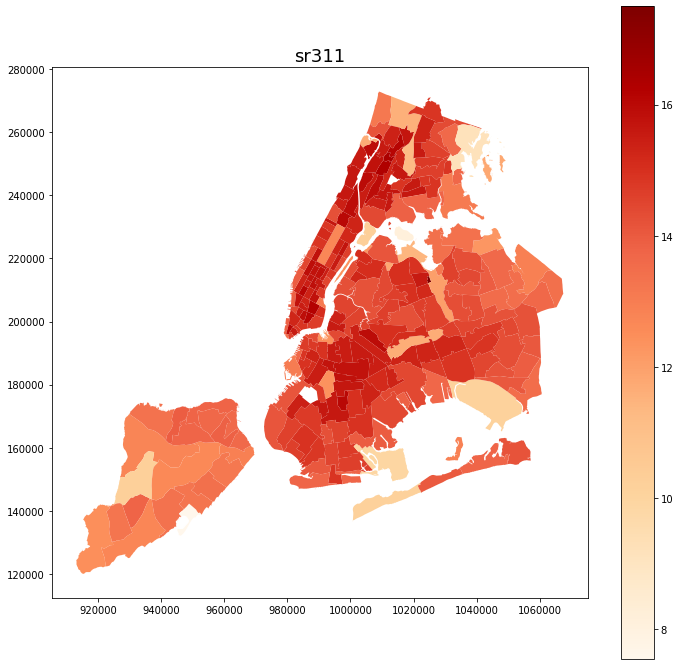

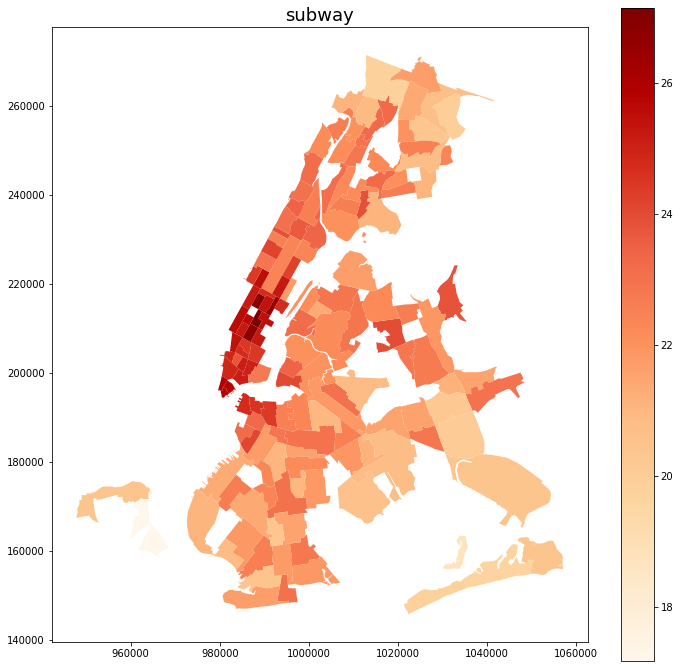

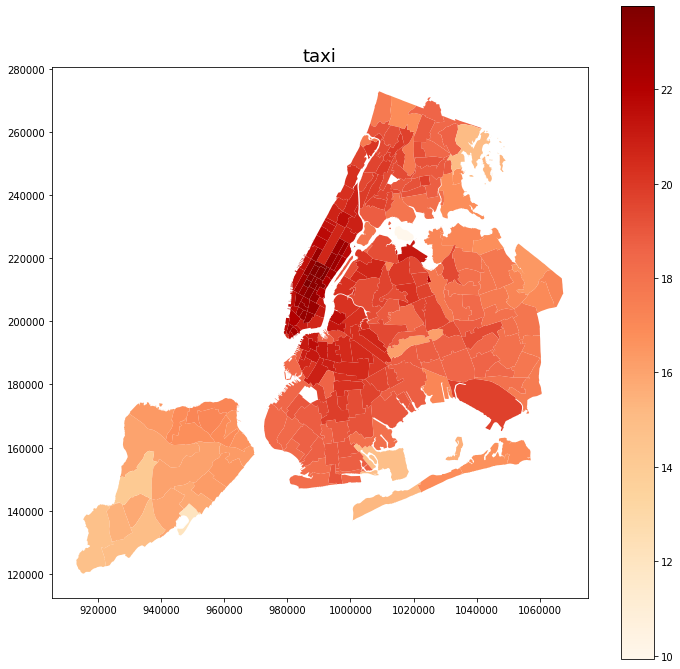

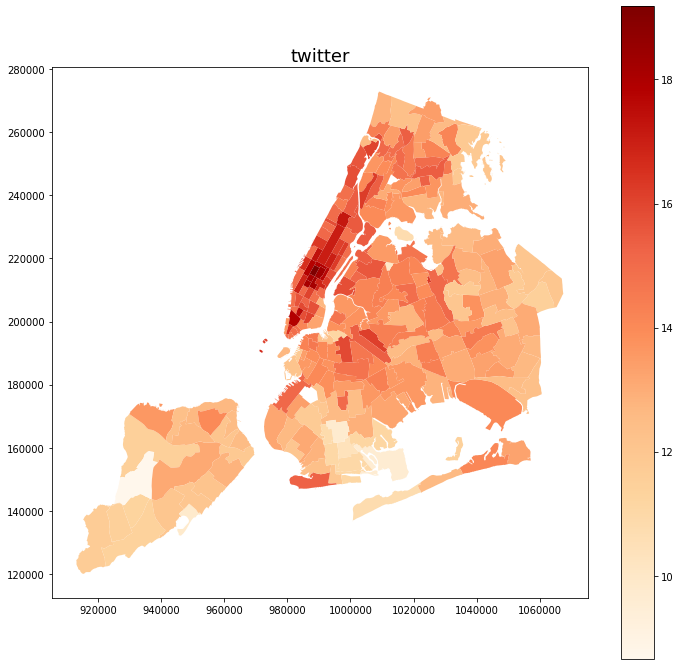

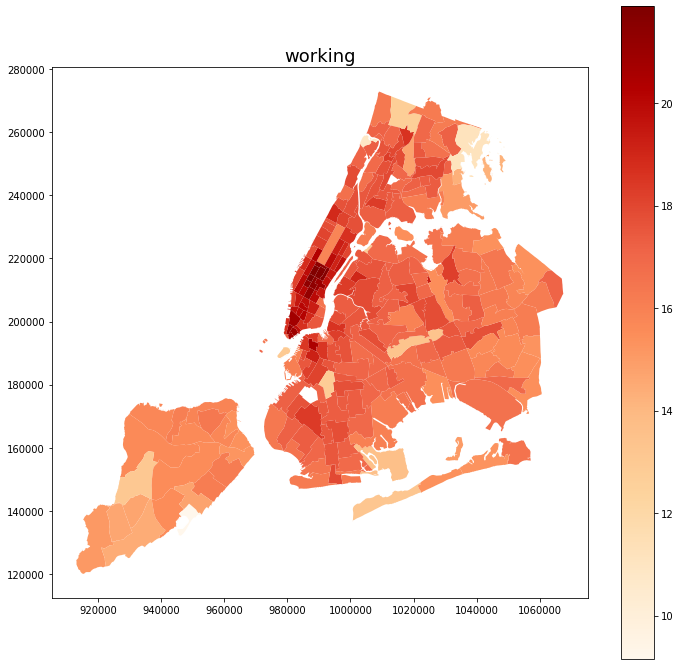

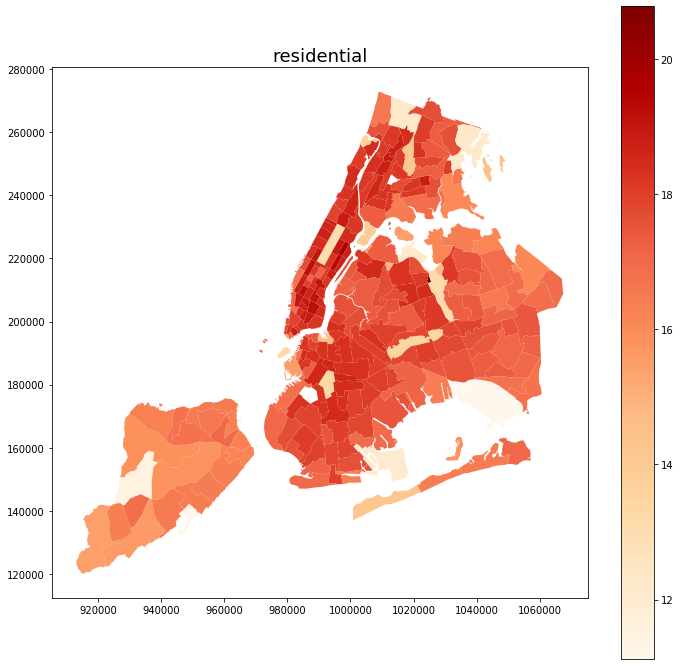

In [68]:
#solution to the optional assignment - visualize all the heatmaps in a single loop
for M in ML:
    f, ax = plt.subplots(1, figsize=(12, 12))
    ax.set_title(M, fontsize=18)
    tzs['X']=np.log(tzs[M]/tzs.Shape_Area)
    tzs[tzs[M]>0].plot(axes=ax, column='X', legend = True, cmap='OrRd')

### Clustering

Try to cluster urban locations based on their relative activity structure

In [69]:
from sklearn.cluster import KMeans #import k-means clustering

In [70]:
TM=['taxi','subway','citibike']

In [71]:
#normalize the ridership
normRide=tzs[TM].div(tzs[TM].sum(axis=1), axis=0).dropna()

In [72]:
tzs2=tzs.merge(normRide,left_index=True, right_index=True, how='inner', suffixes=['','_norm'])